In [3]:
#importing libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [4]:
#importing the dataset
data = pd.read_csv("C:\DataSets\suv_data.csv")
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [5]:
#gender is catagorical data so we need use one hot encoding
encoded_data = pd.get_dummies(data, columns = ['Gender'])
print("Shape : ", data.shape)
print("Encoded Data : \n", encoded_data.head())

Shape :  (400, 5)
Encoded Data : 
     User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0  15624510   19            19000          0              0            1
1  15810944   35            20000          0              0            1
2  15668575   26            43000          0              1            0
3  15603246   27            57000          0              1            0
4  15804002   19            76000          0              0            1


In [6]:
#divide the target data
X = encoded_data.drop(columns = ['User ID', 'Purchased'])
y = data['Purchased']

<Axes: xlabel='Purchased', ylabel='count'>

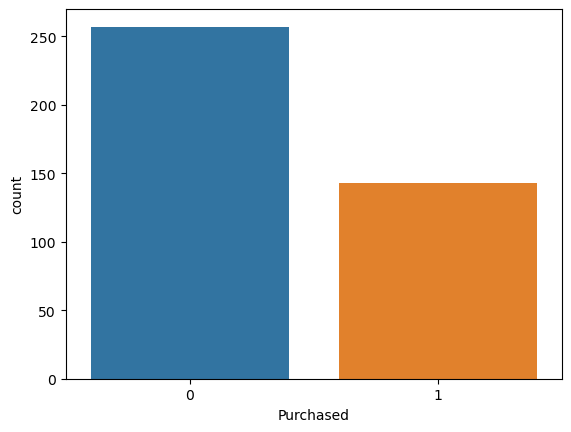

In [7]:
#visualizing the data
sns.countplot(x= data['Purchased'])

In [8]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
#creating the model
log_reg = LogisticRegression()
#Train the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [10]:
#predicting 
y_pred = log_reg.predict(X_test)

In [11]:
#accuracy score
print(log_reg.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))

0.725
0.725


In [12]:
#printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  0]
 [22  0]]


Text(0.5, 3.722222222222216, 'Predicted Purchases')

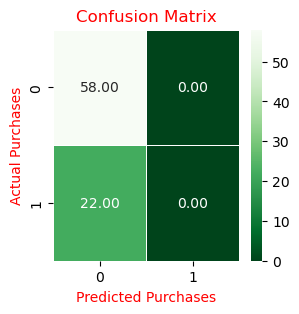

In [13]:
#printing confusion matrix in better way
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, fmt= '.2f', linewidth = 0.5, cmap = 'Greens_r')
plt.title("Confusion Matrix", color= 'RED')
plt.ylabel("Actual Purchases", color = 'RED')
plt.xlabel("Predicted Purchases", color = 'RED')

In [14]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
